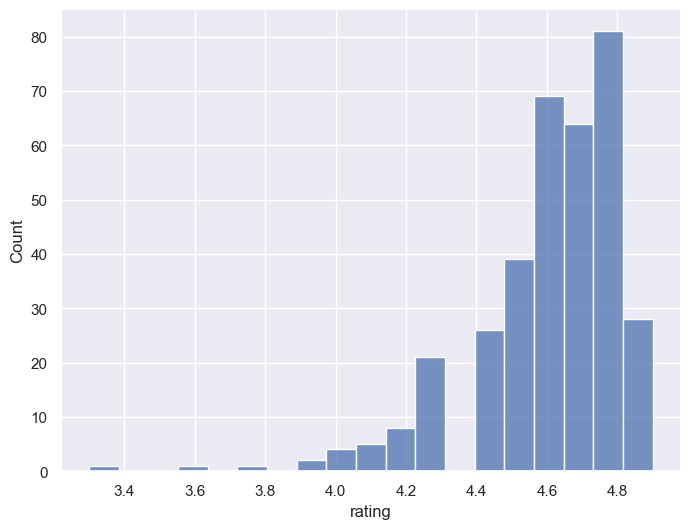

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

books = pd.read_csv('clean_books.csv')
sns.histplot(data = books, x ='rating')
plt.show()

In [48]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [49]:
books['genre'].value_counts()

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

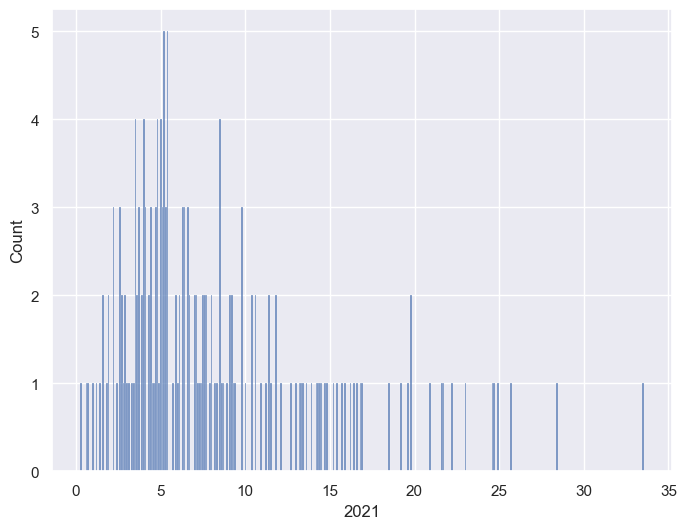

In [50]:
unemployment = pd.read_csv('clean_unemployment.csv')
sns.histplot(data = unemployment, x = "2021",binwidth=0.1)
plt.show()

In [51]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [52]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [53]:
books["genre"].isin(["Fiction","Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [54]:
books[books["genre"].isin(["Fiction","Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [55]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [56]:
books["year"].min()
books["year"].max()

2019

/var/folders/58/gjm58jrx37s74l5_s9f75frm0000gn/T/ipykernel_62431/2083284291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = books, x="year",palette= 'coolwarm')


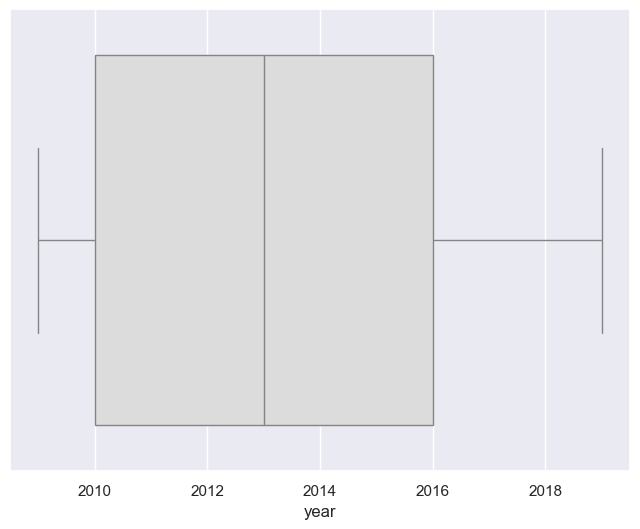

In [57]:
sns.boxplot(data = books, x="year",palette= 'coolwarm')
plt.show()

/var/folders/58/gjm58jrx37s74l5_s9f75frm0000gn/T/ipykernel_62431/3586350838.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = books, x="year",y="genre",palette= 'coolwarm')


<Axes: xlabel='year', ylabel='genre'>

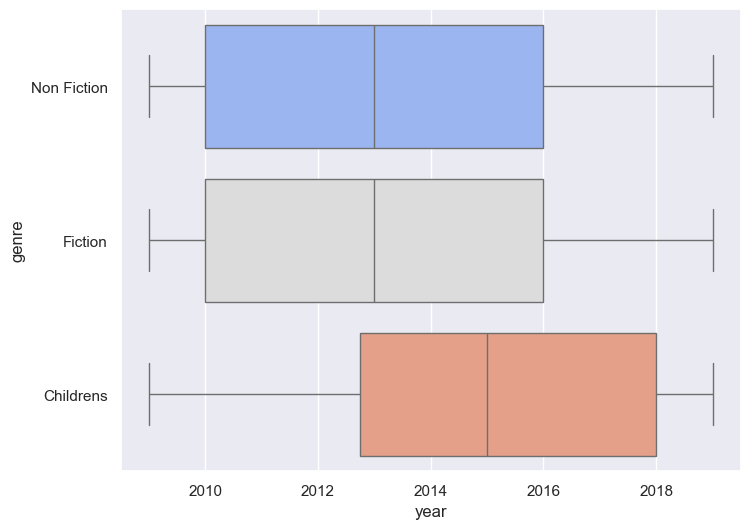

In [58]:
sns.boxplot(data = books, x="year",y="genre",palette= 'coolwarm')

In [59]:
not_oceania = ~unemployment['continent'].isin(['Oceania'])
not_oceania

0       True
1       True
2       True
3       True
4       True
       ...  
177    False
178     True
179     True
180     True
181     True
Name: continent, Length: 182, dtype: bool

0.26 33.56


/var/folders/58/gjm58jrx37s74l5_s9f75frm0000gn/T/ipykernel_62431/689961200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = unemployment, x='2021',y = 'continent',palette= 'coolwarm')


<Axes: xlabel='2021', ylabel='continent'>

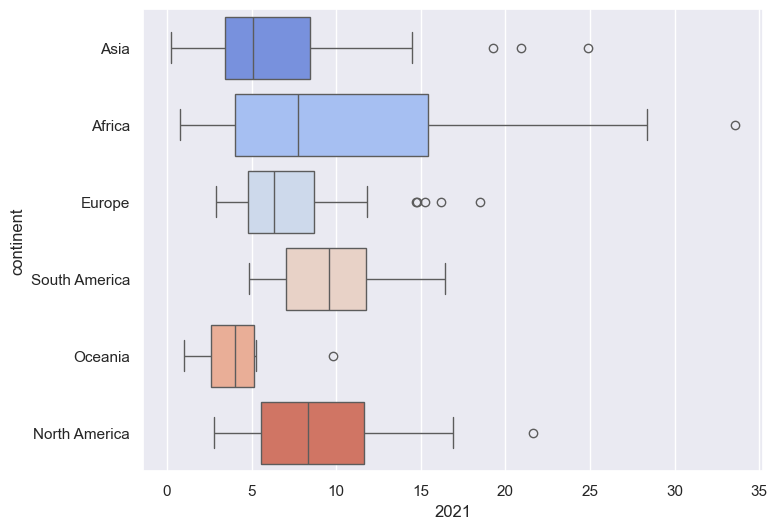

In [60]:
print(unemployment['2021'].min(),unemployment['2021'].max())
sns.boxplot(data = unemployment, x='2021',y = 'continent',palette= 'coolwarm')

In [61]:
books.groupby("genre").mean(numeric_only = True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [62]:
books[['rating','year']].agg(["std","mean"])

,rating,year
std,0.226941,3.284711
mean,4.608571,2013.508571


In [63]:
books.agg({"rating": ["mean","std"],"year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [64]:
books.groupby("genre").agg(
    mean_rating = ("rating","mean"),
    std_rating = ("rating","std"),
    median_year = ("year","median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


/var/folders/58/gjm58jrx37s74l5_s9f75frm0000gn/T/ipykernel_62431/4287988312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= books,x="genre",y="rating",palette= 'coolwarm')


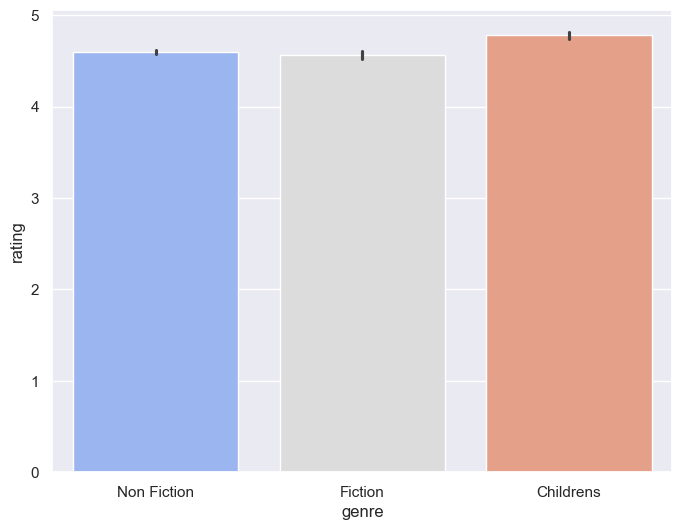

In [65]:
sns.barplot(data= books,x="genre",y="rating",palette= 'coolwarm')
plt.show()

In [66]:
unemployment[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']].agg(["mean","std"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [67]:
import numpy as np
numeric_cols = list(unemployment.select_dtypes(include=np.number).columns)
unemployment.groupby('continent')[numeric_cols].agg(['mean','std'])

2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

In [68]:
continent_summary = unemployment.groupby("continent").agg(
    mean_rate_2021 = ('2021','mean'),
    std_rate_2021 = ('2021','std')
)

print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


/var/folders/58/gjm58jrx37s74l5_s9f75frm0000gn/T/ipykernel_62431/3994776496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = unemployment,x= 'continent',y='2021',palette= 'coolwarm')


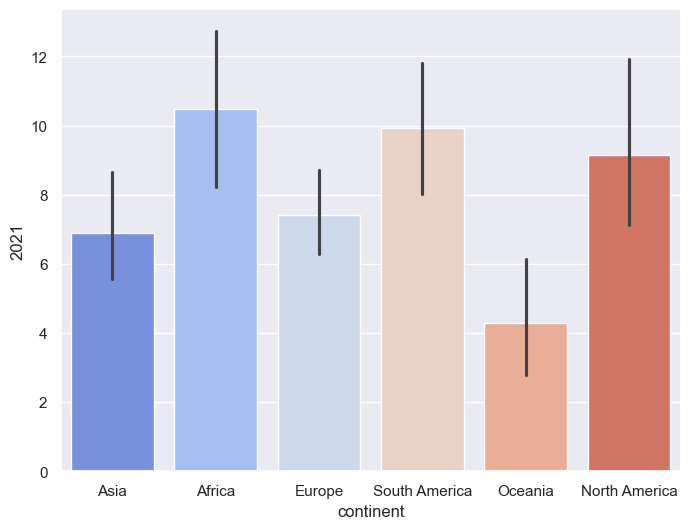

In [69]:
sns.barplot(data = unemployment,x= 'continent',y='2021',palette= 'coolwarm')
plt.show()

In [70]:
salaries = pd.read_csv('ds_salaries_clean.csv')
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


In [71]:
threshold = len(salaries) * 0.05
print(threshold)

30.35


In [72]:
cols_to_drop = salaries.columns[salaries.isna().sum()<=threshold]
print(cols_to_drop)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [73]:
salaries.dropna(subset=cols_to_drop,inplace=True)

In [74]:
cols_with_missing_values = salaries.columns[salaries.isna().sum()>0]
print(cols_with_missing_values)

Index([], dtype='object')


In [75]:
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

In [76]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


In [77]:
planes = pd.read_csv('Airlines_unclean.csv',index_col=0)
planes.head()
print(planes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 999.4+ KB
None


In [78]:
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [79]:
threshold = len(planes) * 0.05
cols_to_drop = planes.columns[planes.isna().sum()<= threshold]
planes.dropna(subset=cols_to_drop,inplace=True)
print(planes.isna().sum())


Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


/var/folders/58/gjm58jrx37s74l5_s9f75frm0000gn/T/ipykernel_62431/334464576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = planes,x ='Airline',y='Price',palette= 'coolwarm')


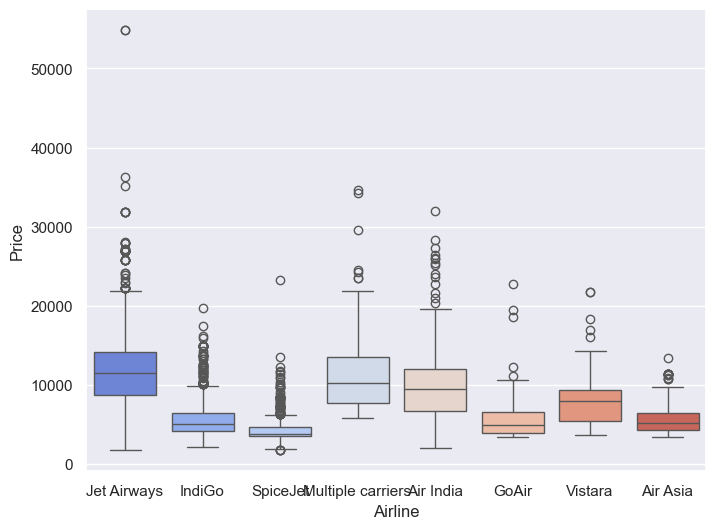

In [80]:
print(planes["Additional_Info"].value_counts())

sns.boxplot(data = planes,x ='Airline',y='Price',palette= 'coolwarm')
sns.set(rc={"figure.figsize":(8,6)})
plt.show()

In [81]:
print(planes.columns)
planes = planes.drop(columns=['Additional_Info'])

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [82]:
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('=====================')

prices_dict = airline_prices.to_dict()
print(prices_dict)
print('==========================')

planes["Prices"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))
print(planes.isna().sum())

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Price              368
Prices               0
dtype: int64


In [83]:
print(salaries.select_dtypes("object").head())

                  Designation Experience Employment_Status Employee_Location  \
0              Data Scientist        Mid                FT                DE   
1  Machine Learning Scientist     Senior                FT                JP   
2           Big Data Engineer     Senior                FT                GB   
3        Product Data Analyst        Mid                FT                HN   
4   Machine Learning Engineer     Senior                FT                US   

  Company_Size  
0            L  
1            S  
2            M  
3            S  
4            L  


In [84]:
print(salaries["Designation"].value_counts())

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [85]:
print(salaries["Designation"].nunique())

50


Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist'],
      dtype='object', name='Designation')


<Axes: xlabel='Designation'>

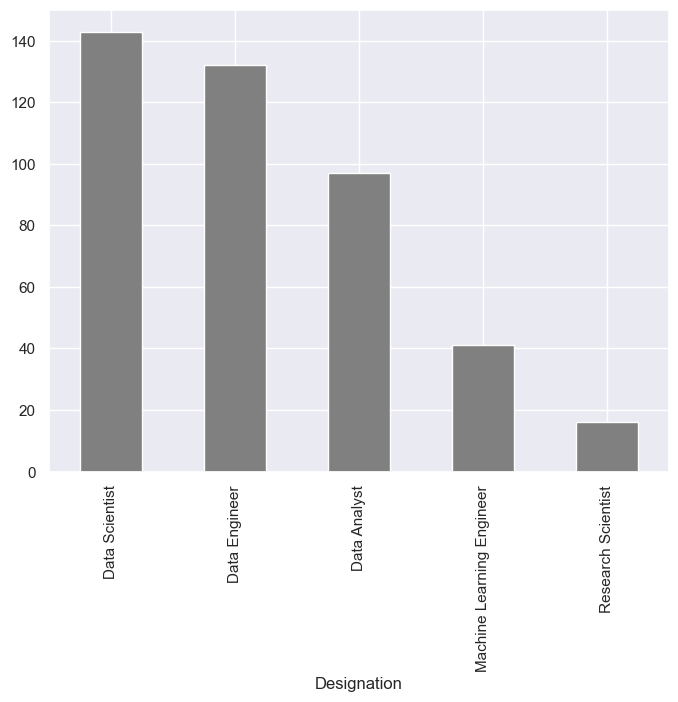

In [86]:
salaries_count = salaries['Designation'].value_counts().iloc[0:5]
print(salaries_count.index)
salaries_count.plot(kind='bar',color= 'grey')

In [87]:
salaries['Designation'].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [88]:
non_numeric = planes.select_dtypes('object')
for col in non_numeric.columns:
    print(f'Number of unique values in {col} column: ',non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  40
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


In [89]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [90]:
planes = pd.read_csv('Airlines_unclean.csv')
planes.dtypes

Unnamed: 0           int64
Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

  Duration Duration_Category
0      19h            Medium
1   5h 25m            Medium
2   4h 45m        Short-haul
3   2h 25m        Short-haul
4  15h 30m            Medium


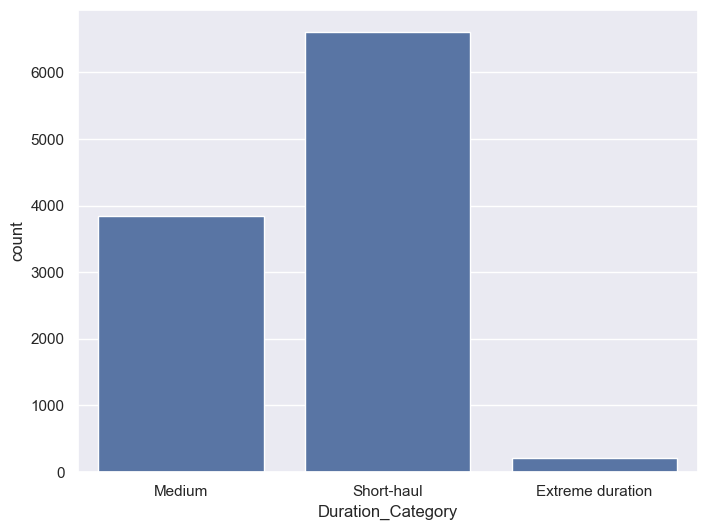

In [92]:
planes["Duration"] = planes["Duration"].astype(str)
flight_categories = ["Short-haul", "Medium", "Long-haul"]
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains('0h|1h|2h|3h|4h')),
    (planes["Duration"].str.contains("5h|6h|7h|8h|9h")),
    (planes["Duration"].str.contains("10h|11h|12h|13h|14h|15h|16h"))
]
 
# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")
 
# Plot the counts of each category
print(planes[['Duration','Duration_Category']].head(5))
sns.countplot(data=planes, x="Duration_Category")
plt.show()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
0    19.00
1     5.25
2     4.45
3     2.25
4    15.30
Name: Duration, dtype: float64


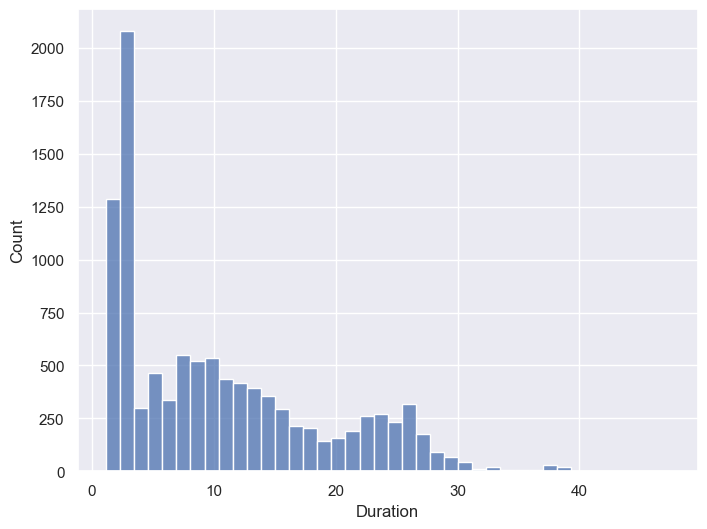

In [ ]:
print(planes["Duration"].head())
planes['Duration'] = planes['Duration'].astype(str)

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

print(planes['Duration'].head())
# Plot a histogram
sns.histplot(data=planes, x="Duration")
plt.show()

In [ ]:
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
Name: count, dtype: int64


In [93]:
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline", "airline_median_duration"]].value_counts())

TypeError: Cannot convert ['2h 45m' '2h 50m' '2h 45m' '2h 35m' '2h 35m' '15h 55m' '11h' '3h 40m'
 '11h 50m' '5h 30m' '5h 30m' '13h 50m' '2h 35m' '2h 30m' '2h 50m' '12h'
 '2h 45m' '2h 45m' '5h 30m' '2h 35m' '2h 35m' '5h 30m' '8h 20m' '3h 40m'
 '2h 35m' '2h 30m' '3h 40m' '2h 30m' '2h 45m' '14h 25m' '2h 30m' '2h 50m'
 '2h 50m' '14h 25m' '2h 30m' '2h 30m' '10h 25m' '11h 50m' '2h 50m'
 '5h 30m' '15h 55m' '2h 45m' '9h 50m' '2h 50m' '12h' '2h 50m' '14h 30m'
 '2h 35m' '3h 35m' '2h 50m' '2h 50m' '2h 35m' '8h 20m' '2h 50m' '5h 40m'
 '2h 30m' '14h 25m' '10h 25m' '8h 20m' '2h 45m' '10h 25m' '2h 50m'
 '2h 50m' '2h 45m' '5h 40m' '2h 50m' '2h 50m' '14h 30m' '2h 35m' '2h 30m'
 '15h 55m' '2h 50m' '2h 30m' '2h 30m' '12h' '14h 25m' '2h 30m' '14h 30m'
 '2h 30m' '2h 35m' '14h 30m' '5h 30m' '14h 25m' '14h 25m' '2h 30m' '12h'
 '14h 25m' '11h' '2h 50m' '2h 30m' '3h 35m' '10h 25m' '2h 45m' '2h 30m'
 '12h' '2h 30m' '14h 25m' '2h 30m' '2h 35m' '14h 35m' '2h 30m' '2h 45m'
 '2h 30m' '2h 35m' '2h 30m' '10h 25m' '11h 50m' '5h 40m' '2h 45m'
 '11h 50m' '2h 50m' '2h 50m' '2h 50m' '14h 30m' '2h 50m' '2h 30m' '2h 45m'
 '14h 30m' '5h 40m' '15h 55m' '2h 45m' '11h 50m' '10h 25m' '2h 30m'
 '3h 40m' '2h 50m' '2h 30m' '2h 45m' '2h 35m' '15h 55m' '2h 45m' '5h 40m'
 '10h 25m' '15h 55m' '3h 40m' '9h 50m' '8h 20m' '2h 50m' '3h 40m'
 '13h 50m' '8h 20m' '5h 30m' '2h 30m' '2h 45m' '15h 55m' '2h 50m' '5h 30m'
 '2h 45m' '2h 50m' '14h 30m' '7h 50m' '11h 50m' '2h 30m' '2h 50m' '2h 50m'
 '2h 50m' '2h 50m' '2h 30m' '2h 50m' '5h 45m' '3h 40m' '2h 50m' '14h 25m'
 '11h 50m' '2h 50m' '5h 40m' '7h 50m' '3h 35m' '7h 50m' '2h 50m' '2h 50m'
 '2h 50m' '7h 30m' '10h 25m' '11h' '2h 35m' '15h 55m' '2h 45m' '2h 50m'
 '10h 25m' '2h 30m' '2h 30m' '2h 35m' '2h 30m' '8h 20m' '2h 35m' '2h 45m'
 '14h 30m' '11h 50m' '5h 30m' '2h 30m' '2h 50m' '10h 25m' '2h 50m'
 '2h 30m' '2h 30m' '2h 30m' '2h 50m' '5h 15m' '2h 50m' '2h 50m' 'nan'
 '2h 50m' '2h 30m' '2h 50m' '3h 40m' '2h 30m' '2h 50m' '5h 40m' '2h 30m'
 '2h 30m' 'nan' '2h 35m' '2h 30m' '15h 55m' '11h' '5h 30m' '5h 30m'
 '2h 45m' '5h 40m' '3h 40m' '2h 50m' '10h 25m' '14h 30m' '2h 35m' '2h 30m'
 '2h 30m' '5h 30m' '2h 45m' '2h 35m' '3h 40m' '2h 50m' '2h 30m' '3h 35m'
 '2h 50m' '2h 30m' '2h 35m' '2h 45m' '2h 30m' '2h 30m' '2h 45m' '2h 50m'
 '2h 45m' '2h 30m' '2h 35m' '7h 50m' '5h 40m' '2h 30m' '11h 50m' '2h 50m'
 '14h 25m' '2h 35m' '8h 20m' '12h' '2h 45m' '2h 45m' '2h 30m' '12h'
 '2h 30m' '2h 30m' '5h 40m' '3h 35m' '2h 35m' '2h 30m' '2h 50m' '2h 50m'
 '5h 40m' '2h 35m' '2h 30m' '2h 30m' '2h 50m' '2h 50m' '2h 35m' '2h 30m'
 '2h 50m' '3h 40m' '2h 30m' '15h 55m' '2h 35m' '14h 30m' '2h 45m' 'nan'
 '2h 45m' '2h 45m' '2h 35m' '5h 30m' '5h 30m' '15h 55m' '14h 30m' '8h 20m'
 '2h 30m' '11h 50m' '14h 25m' '2h 30m' '2h 45m' 'nan' '15h 20m' '14h 25m'
 '12h' '2h 30m' '2h 30m' '14h 25m' '2h 50m' '14h 25m' '2h 30m' '14h 30m'
 '2h 30m' '2h 45m' '2h 30m'] to numeric

In [ ]:
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
Name: count, dtype: int64
